In [6]:
#basic imports
import pandas as pd
df = pd.read_csv("car_data.csv")
#Removing commas in Price Column
df['Price']=df['Price'].str.replace(',','')

#Converting Price currency from Indian Rupees to US Dollars
df['Price'] = pd.to_numeric(df['Price'])
df.loc[:, 'Price'] *= 0.012

#Converting No. Owners from String description to int
df['No_of_Owners']=df['No_of_Owners'].str.replace('1st', "1")
df['No_of_Owners']=df['No_of_Owners'].str.replace('2nd', "2")
df['No_of_Owners']=df['No_of_Owners'].str.replace('3rd', "3")
df['No_of_Owners'] = pd.to_numeric(df['No_of_Owners'])

df = df.rename(columns = {"Fuel_Tank_Capacity(L)" : "Fuel_Tank_Capacity(G)"})
df.loc[:, 'Fuel_Tank_Capacity(G)'] /= 3.785

df.head()
###mean is 8892.233607

/tmp/ipykernel_1136707/2342325992.py:9: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Price'] *= 0.012


,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(G),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,"44,611",1,5,diesel,11.889036,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,7884.0
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,"20,305",1,5,petrol,11.889036,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,8184.0
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,"29,540",2,5,petrol,10.568032,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.5,BS IV,9516.0
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,"35,680",1,5,petrol,7.397622,1.0L,999,5-Speed,Manual,67.00,91.00,21.7,BS IV,4968.0
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,"25,126",1,5,petrol,11.360634,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.9,BS V,6180.0


In [53]:
#stuff
import numpy as np
import matplotlib.pyplot as plt
###mean is 8892.233607
top_half = df[df['Price']>8892.233607]

<AxesSubplot: >

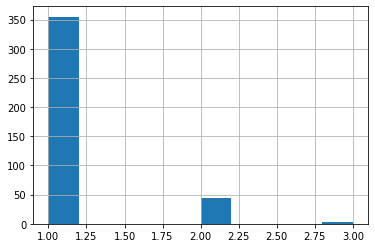

In [54]:
###what number of owners is most common?
top_half["No_of_Owners"].hist()

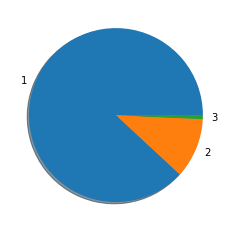

In [55]:
noo1 = top_half["No_of_Owners"].value_counts()[1.0]
noo2 = top_half["No_of_Owners"].value_counts()[2.0]
noo3 = top_half["No_of_Owners"].value_counts()[3.0]
top_total = len(top_half)
noo_arr = np.array([(noo1/noo_total), (noo2/noo_total), (noo3/noo_total)])
noo_labels = ["1", "2", "3"]
plt.pie(noo_arr, labels = noo_labels, shadow = True)
plt.show()

<AxesSubplot: >

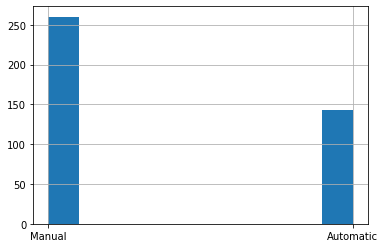

In [56]:
###what transmission types are most common?
top_half["Transmission_Type"].hist()

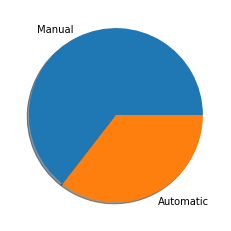

In [57]:
tt1 = top_half["Transmission_Type"].value_counts()["Manual"]
tt2 = top_half["Transmission_Type"].value_counts()["Automatic"]
tt_arr = np.array([(tt1/top_total), (tt2/top_total)])
tt_labels = ["Manual", "Automatic"]
plt.pie(tt_arr, labels = tt_labels, shadow = True)
plt.show()

<AxesSubplot: >

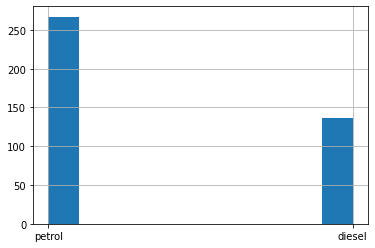

In [58]:
#what fuel type is most common?
top_half["Fuel_Type"].hist()

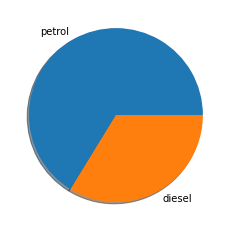

In [59]:
ft1 = top_half["Fuel_Type"].value_counts()["petrol"]
ft2 = top_half["Fuel_Type"].value_counts()["diesel"]
ft_arr = np.array([(ft1/top_total), (ft2/top_total)])
ft_labels = ["petrol", "diesel"]
plt.pie(ft_arr, labels = ft_labels, shadow = True)
plt.show()

<AxesSubplot: >

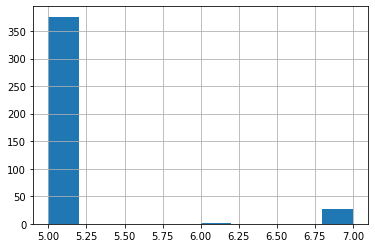

In [60]:
#what seating capacity is most common?
top_half["Seating_Capacity"].hist()

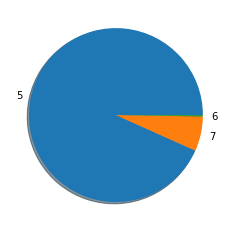

In [63]:
top_half["Seating_Capacity"].unique()
sc1 = top_half["Seating_Capacity"].value_counts()[5.0]
sc2 = top_half["Seating_Capacity"].value_counts()[7.0]
sc3 = top_half["Seating_Capacity"].value_counts()[6.0]
sc_arr = np.array([(sc1/top_total), (sc2/top_total), (sc3/top_total)])
sc_labels = ["5", "7", "6"]
plt.pie(sc_arr, labels = sc_labels, shadow = True)
plt.show()

In [66]:
"""
specific insights:
the average price is $8892.23 for used cars
for the used cars with an above average price,
    1. They mostly have only one previous owner
        1b. They also sometimes have two previous owners
    2. They tend to have a manual transmission
        2b. It is not uncommon for them to have an automatic transmission
    3. They tend to run on petrol as opposed to diesel
        3b. It is not uncommon for them to run on diesel
    4. They overwhelmingly have a seating capacity of 5
        4b. They also occasionally have a seating capacity of 7
    A used car with only one previous owner, a manual transmission, which runs on petrol, and has a seating capacity of 5 would be the most expensive. 
    If a shopper's needs can be met without these attributes, they should  be avoided to keep costs down
"""

'\nspecific insights:\nthe average price is $8892.23 for used cars\nfor the used cars with an above average price,\n    1. They mostly have only one previous owner\n        1b. They also sometimes have two previous owners\n    2. They tend to have a manual transmission\n        2b. It is not uncommon for them to have an automatic transmission\n    3. They tend to run on petrol as opposed to diesel\n        3b. It is not uncommon for them to run on diesel\n    4. They overwhelmingly have a seating capacity of 5\n        4b. They also occasionally have a seating capacity of 7\n'

array([2019, 2021, 2020, 2022, 2017, 2018, 2016, 2015, 2014])

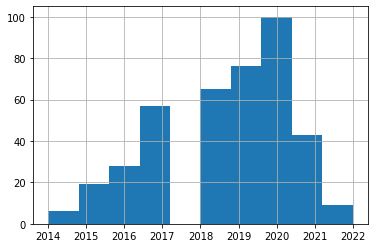

In [68]:
top_half["Make_Year"].hist()
top_half["Make_Year"].unique()

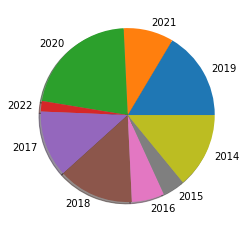

In [71]:
my1 = top_half["Make_Year"].value_counts()[2019]
my2 = top_half["Make_Year"].value_counts()[2021]
my3 = top_half["Make_Year"].value_counts()[2020]
my4 = top_half["Make_Year"].value_counts()[2022]
my5 = top_half["Make_Year"].value_counts()[2017]
my6 = top_half["Make_Year"].value_counts()[2018]
my7 = top_half["Make_Year"].value_counts()[2016]
my8 = top_half["Make_Year"].value_counts()[2015]
my9 = top_half["Make_Year"].value_counts()[2014]

my_arr = np.array([(my1/top_total), (my2/top_total), (my3/top_total), (my4/top_total), (my5/top_total), (my6/top_total), (my7/top_total), (my8/top_total), (my6/top_total)])
my_labels = ["2019", "2021", "2020", "2022", "2017", "2018", "2016", "2015", "2014"]
plt.pie(my_arr, labels = my_labels, shadow = True)
plt.show()

array([2017, 2016, 2019, 2012, 2021, 2020, 2013, 2022, 2018, 2014, 2011,
       2015])

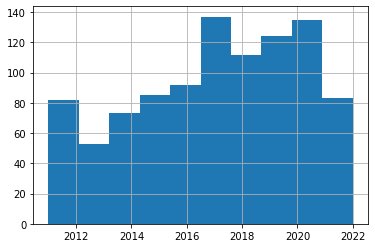

In [73]:
df["Make_Year"].hist()
df["Make_Year"].unique()

In [0]:
df

In [1]:
top_total = len(top_half)

tt1 = top_half["Transmission_Type"].value_counts()["Manual"]
tt2 = top_half["Transmission_Type"].value_counts()["Automatic"]
tt_arr = np.array([(tt1/top_total), (tt2/top_total)])
tt_labels = ["Manual", "Automatic"]
plt.pie(tt_arr, labels = tt_labels, shadow = True)
plt.show()

ft1 = top_half["Fuel_Type"].value_counts()["petrol"]
ft2 = top_half["Fuel_Type"].value_counts()["diesel"]
ft_arr = np.array([(ft1/top_total), (ft2/top_total)])
ft_labels = ["petrol", "diesel"]
plt.pie(ft_arr, labels = ft_labels, shadow = True)
plt.show()

top_half["Seating_Capacity"].unique()
sc1 = top_half["Seating_Capacity"].value_counts()[5.0]
sc2 = top_half["Seating_Capacity"].value_counts()[7.0]
sc3 = top_half["Seating_Capacity"].value_counts()[6.0]
sc_arr = np.array([(sc1/top_total), (sc2/top_total), (sc3/top_total)])
sc_labels = ["5", "7", "6"]
plt.pie(sc_arr, labels = sc_labels, shadow = True)
plt.show()

print("most of the more expensive cars are manual, run on petrol, and have a seating capacity of 5")


NameError: name 'top_half' is not defined

In [2]:

###tophalf stuff (teddy)
top_total = len(top_half)
#tttop
tt1 = top_half["Transmission_Type"].value_counts()["Manual"]
tt2 = top_half["Transmission_Type"].value_counts()["Automatic"]
tt_arr = np.array([(tt1/top_total), (tt2/top_total)])
tt_labels = ["Manual", "Automatic"]
st.plotly_chart(plt.pie(tt_arr, labels = tt_labels, shadow = True))
#fttop
ft1 = top_half["Fuel_Type"].value_counts()["petrol"]
ft2 = top_half["Fuel_Type"].value_counts()["diesel"]
ft_arr = np.array([(ft1/top_total), (ft2/top_total)])
ft_labels = ["petrol", "diesel"]
st.plotly_chart(plt.pie(ft_arr, labels = ft_labels, shadow = True))
#sctop
top_half["Seating_Capacity"].unique()
sc1 = top_half["Seating_Capacity"].value_counts()[5.0]
sc2 = top_half["Seating_Capacity"].value_counts()[7.0]
sc3 = top_half["Seating_Capacity"].value_counts()[6.0]
sc_arr = np.array([(sc1/top_total), (sc2/top_total), (sc3/top_total)])
sc_labels = ["5", "7", "6"]
st.plotly_chart(plt.pie(sc_arr, labels = sc_labels, shadow = True))

NameError: name 'top_half' is not defined

In [3]:
import matplotlib.pyplot as plt


###tophalf stuff (teddy)
top_total = len(top_half)
#tttop
tt1 = top_half["Transmission_Type"].value_counts()["Manual"]
tt2 = top_half["Transmission_Type"].value_counts()["Automatic"]
tt_arr = np.array([(tt1/top_total), (tt2/top_total)])
tt_labels = ["Manual", "Automatic"]
st.plotly_chart(plt.pie(tt_arr, labels = tt_labels, shadow = True))
#fttop
ft1 = top_half["Fuel_Type"].value_counts()["petrol"]
ft2 = top_half["Fuel_Type"].value_counts()["diesel"]
ft_arr = np.array([(ft1/top_total), (ft2/top_total)])
ft_labels = ["petrol", "diesel"]
st.plotly_chart(plt.pie(ft_arr, labels = ft_labels, shadow = True))
#sctop
top_half["Seating_Capacity"].unique()
sc1 = top_half["Seating_Capacity"].value_counts()[5.0]
sc2 = top_half["Seating_Capacity"].value_counts()[7.0]
sc3 = top_half["Seating_Capacity"].value_counts()[6.0]


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

st.pyplot(fig1)

NameError: name 'top_half' is not defined

In [4]:
###tophalf stuff (teddy)
top_total = len(top_half)
#tttop
tt1 = top_half["Transmission_Type"].value_counts()["Manual"]
tt2 = top_half["Transmission_Type"].value_counts()["Automatic"]
tt_arr = np.array([(tt1/top_total), (tt2/top_total)])
tt_labels = ["Manual", "Automatic"]
fig1, ax1 = plt.subplots()
plt.pie(tt_arr, labels = tt_labels, shadow = True)
#fttop
ft1 = top_half["Fuel_Type"].value_counts()["petrol"]
ft2 = top_half["Fuel_Type"].value_counts()["diesel"]
ft_arr = np.array([(ft1/top_total), (ft2/top_total)])
ft_labels = ["petrol", "diesel"]
plt.pie(ft_arr, labels = ft_labels, shadow = True)
#sctop
top_half["Seating_Capacity"].unique()
sc1 = top_half["Seating_Capacity"].value_counts()[5.0]
sc2 = top_half["Seating_Capacity"].value_counts()[7.0]
sc3 = top_half["Seating_Capacity"].value_counts()[6.0]
plt.pie(sc_arr, labels = sc_labels, shadow = True)




with col1:
   st.pyplot(fig3)

with col2:
   st.pyplot(fig2)

with col3:
   st.pyplot(fig3)

NameError: name 'top_half' is not defined

In [8]:
bottom_half = df[df['Price']<=8892.233607]
bottom_half['Seating_Capacity'].unique()

array([5, 7, 8, 4])